# Exercises XP Ninja: W2_D2

### What You’ll Learn

- Practice converting unstructured data into a structured format.  
- Conduct a basic analysis of a dataset.  
- Gain knowledge of various tools and techniques for processing both structured and unstructured data, including sentiment analysis.  

### What You Will Create

- Transform an unstructured dataset into a structured format, creating a new, organized dataset.  
- Create reports that detail the analysis of both a structured and an unstructured dataset, highlighting key findings.  

---

### Exercise 1 : Comparative Analysis of Structured and Unstructured Data

- Given two datasets – one structured (CSV file of product sales data) and one unstructured (collection of customer support tickets) – perform a basic analysis on each.  
- Identify the challenges faced while processing the unstructured dataset as compared to the structured dataset.  
- Describe the tools and techniques that were effective for each type of data.  

**Hint:** Use Sentiment Analysis with TextBlob.  

---

### Exercise 2 : Converting Unstructured Data to Structured Data

- You are given an unstructured dataset containing tweets.  
- Apply text processing techniques to extract key information (such as hashtags and mentions; note that a “sentiment” column is already provided) from the dataset.  
- Organize this extracted information into a structured format (like a table with columns for each key information type).  
- Perform a basic analysis on the newly structured data and compare insights with the original unstructured format.  

## Exercise 1 — Comparative Analysis of Structured and Unstructured Data

## Objective
Analyze a structured product sales dataset and an unstructured customer support tickets dataset, then compare insights and processing challenges.

### Steps
1. Structured data analysis (statsfinal.csv)  
2. Unstructured data analysis (customer_support_tickets.csv) with sentiment analysis  
3. Comparative analysis and discussion of challenges

### 1. Load Structured Dataset

In [1]:
# Description: Load the structured CSV file containing product sales data.

import pandas as pd

structured_df = pd.read_csv("statsfinal.csv", encoding="utf-8")

print("Structured dataset shape:", structured_df.shape)
structured_df.head()

Structured dataset shape: (4600, 10)


,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


### 2. Structured Data Analysis

Detected date column: Date
Detected sales columns: ['S-P1', 'S-P2', 'S-P3', 'S-P4']


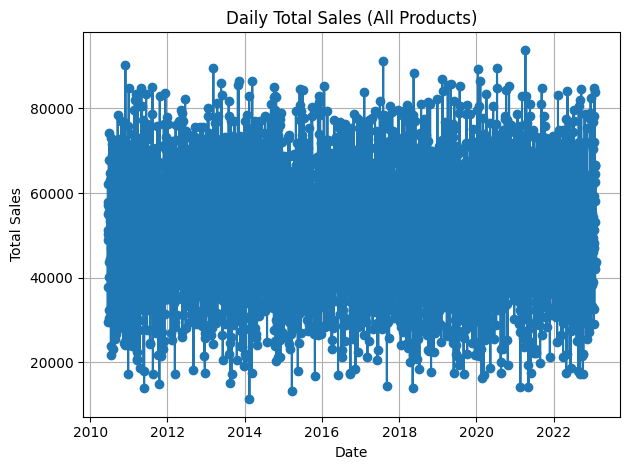

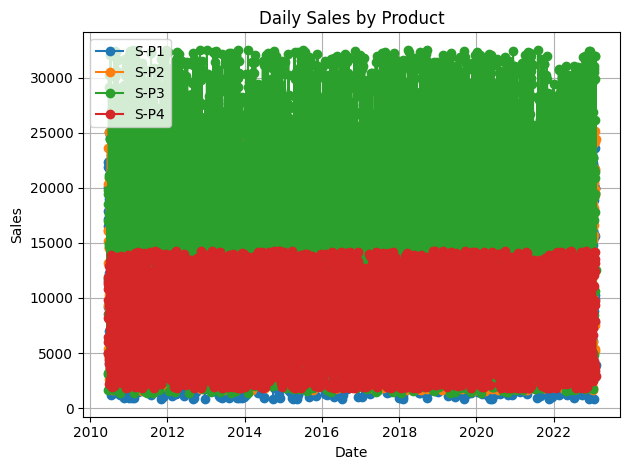

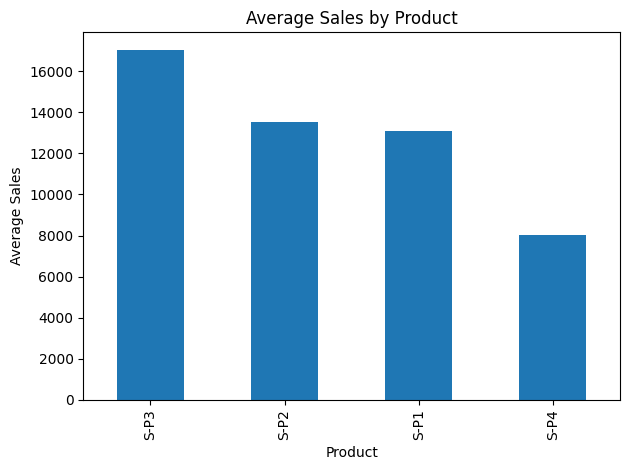

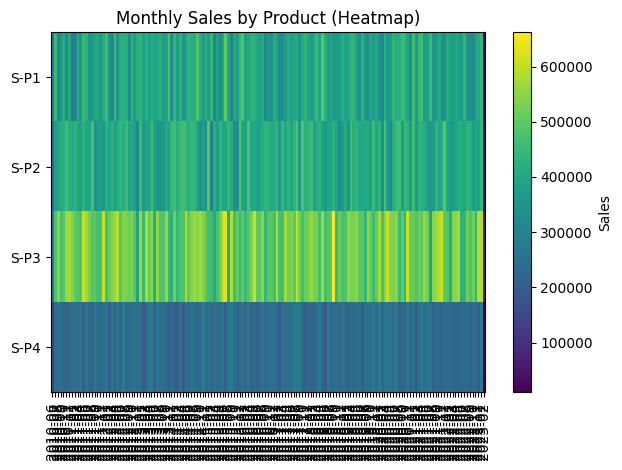

In [4]:
# Title: Retail Time-Series Visualizations (All-in-one)
# Description: Load statsfinal.csv, detect sales/date columns, and produce 4 complementary charts.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# ---------- 1) Load ----------
# Try UTF-8, fallback to latin1 if needed
csv_path = "statsfinal.csv"
try:
    structured_df = pd.read_csv(csv_path, encoding="utf-8")
except UnicodeDecodeError:
    structured_df = pd.read_csv(csv_path, encoding="latin1")

# Drop obvious index-like columns if present
for c in ["Unnamed: 0", "index"]:
    if c in structured_df.columns:
        structured_df = structured_df.drop(columns=c)

# ---------- 2) Detect columns ----------
# Sales columns look like S-P1..S-P4 in your sample
sales_cols = [c for c in structured_df.columns if re.match(r"^S[-_ ]?P\d+$", str(c))]
if not sales_cols:
    # Fallback: any column starting with 'S-' or containing 'Sales'
    sales_cols = [c for c in structured_df.columns if str(c).lower().startswith("s-") or "sales" in str(c).lower()]

# Date column (your sample uses 'Date' as dd-mm-YYYY)
date_col = None
for candidate in ["Date", "date", "Datetime", "datetime", "InvoiceDate", "invoice_date", "timestamp"]:
    if candidate in structured_df.columns:
        date_col = candidate
        break
if date_col is None:
    raise KeyError("No date-like column found. Please ensure a 'Date' column exists.")

# Parse dates (dayfirst format based on your sample: '13-06-2010')
structured_df[date_col] = pd.to_datetime(structured_df[date_col], errors="coerce", dayfirst=True)
structured_df = structured_df.dropna(subset=[date_col])

# Coerce sales columns to numeric
for c in sales_cols:
    structured_df[c] = pd.to_numeric(structured_df[c], errors="coerce")

if not sales_cols:
    raise KeyError("No sales columns detected (e.g., 'S-P1', 'S-P2', ...).")

print(f"Detected date column: {date_col}")
print(f"Detected sales columns: {sales_cols}")

# Total daily sales
structured_df["TotalSales"] = structured_df[sales_cols].sum(axis=1)

# ---------- 3) Chart #1: Daily total sales (line) ----------
plt.figure()
plt.plot(structured_df[date_col], structured_df["TotalSales"], marker="o", linestyle="-")
plt.title("Daily Total Sales (All Products)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- 4) Chart #2: Sales by product over time (multi-line) ----------
plt.figure()
for c in sales_cols:
    plt.plot(structured_df[date_col], structured_df[c], marker="o", linestyle="-", label=c)
plt.title("Daily Sales by Product")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- 5) Chart #3: Average sales by product (bar) ----------
avg_sales = structured_df[sales_cols].mean().sort_values(ascending=False)
plt.figure()
avg_sales.plot(kind="bar")
plt.title("Average Sales by Product")
plt.xlabel("Product")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

# ---------- 6) Chart #4: Monthly sales heatmap (products x months) ----------
# Build monthly totals
structured_df["Month"] = structured_df[date_col].dt.to_period("M")
monthly = structured_df.groupby("Month")[sales_cols].sum()

# Convert to matrix for imshow (rows=products, cols=months)
heat_matrix = monthly.T.values  # shape: (len(products), len(months))
months = monthly.index.astype(str).tolist()
products = monthly.columns.tolist()

plt.figure()
plt.imshow(heat_matrix, aspect="auto", interpolation="nearest")
plt.title("Monthly Sales by Product (Heatmap)")
plt.colorbar(label="Sales")
plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=90)
plt.yticks(ticks=np.arange(len(products)), labels=products)
plt.tight_layout()
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_71232\2520617090.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = structured_df.resample("M", on="Date")["Total_Sales"].sum()


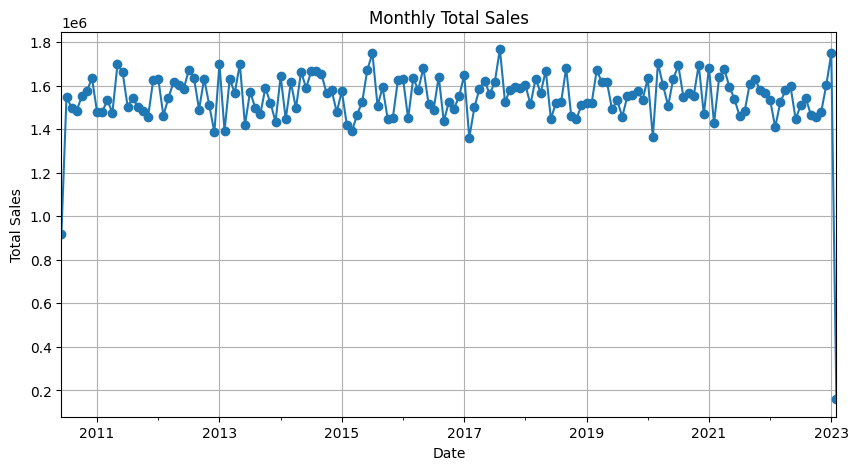

In [5]:
# Convertir en datetime
structured_df["Date"] = pd.to_datetime(structured_df["Date"], dayfirst=True)

# Calculer total ventes par jour
structured_df["Total_Sales"] = structured_df[["S-P1", "S-P2", "S-P3", "S-P4"]].sum(axis=1)

# Regrouper par mois
monthly_sales = structured_df.resample("M", on="Date")["Total_Sales"].sum()

# Graph mensuel
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_71232\993580576.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_sales = structured_df.resample("Y", on="Date")["Total_Sales"].sum()


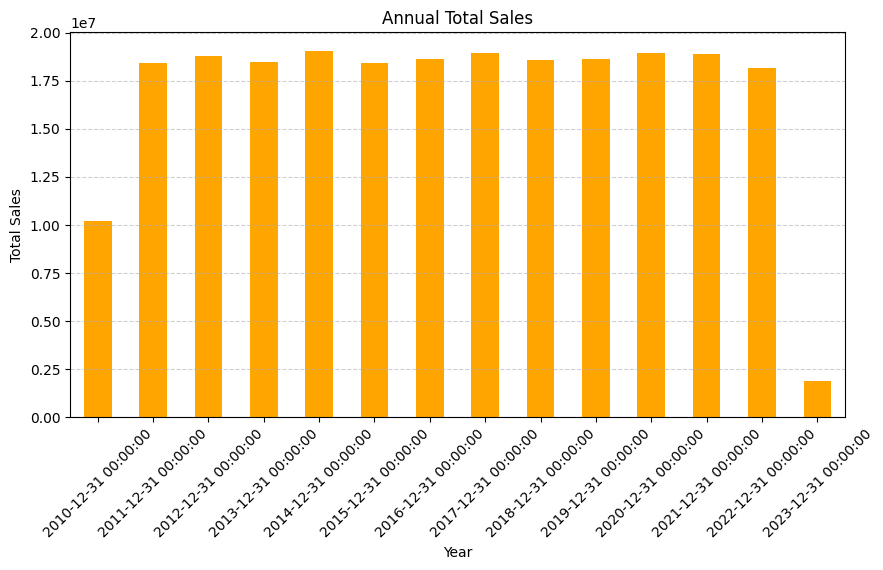

In [7]:
# Regroupement par année
annual_sales = structured_df.resample("Y", on="Date")["Total_Sales"].sum()

# Graphique
plt.figure(figsize=(10,5))
annual_sales.plot(kind="bar", color="orange")
plt.title("Annual Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_71232\3025169555.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_product_sales = structured_df.resample("M", on="Date")[["S-P1", "S-P2", "S-P3", "S-P4"]].sum()


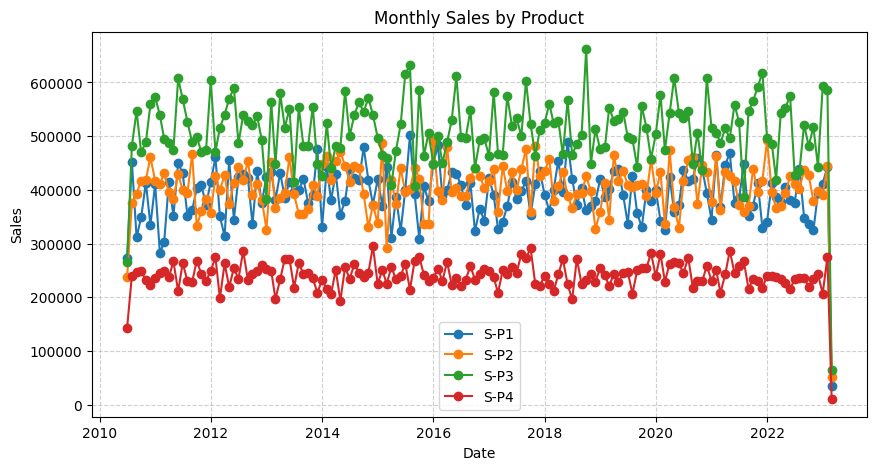

In [8]:
# Regrouper par mois pour chaque produit
monthly_product_sales = structured_df.resample("M", on="Date")[["S-P1", "S-P2", "S-P3", "S-P4"]].sum()

# Graphique
plt.figure(figsize=(10,5))
for col in monthly_product_sales.columns:
    plt.plot(monthly_product_sales.index, monthly_product_sales[col], marker="o", label=col)

plt.title("Monthly Sales by Product")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_71232\1046459163.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d2 = pd.to_datetime(s[mask], errors="coerce", dayfirst=False)


Dropped 26 rows with unparseable dates.


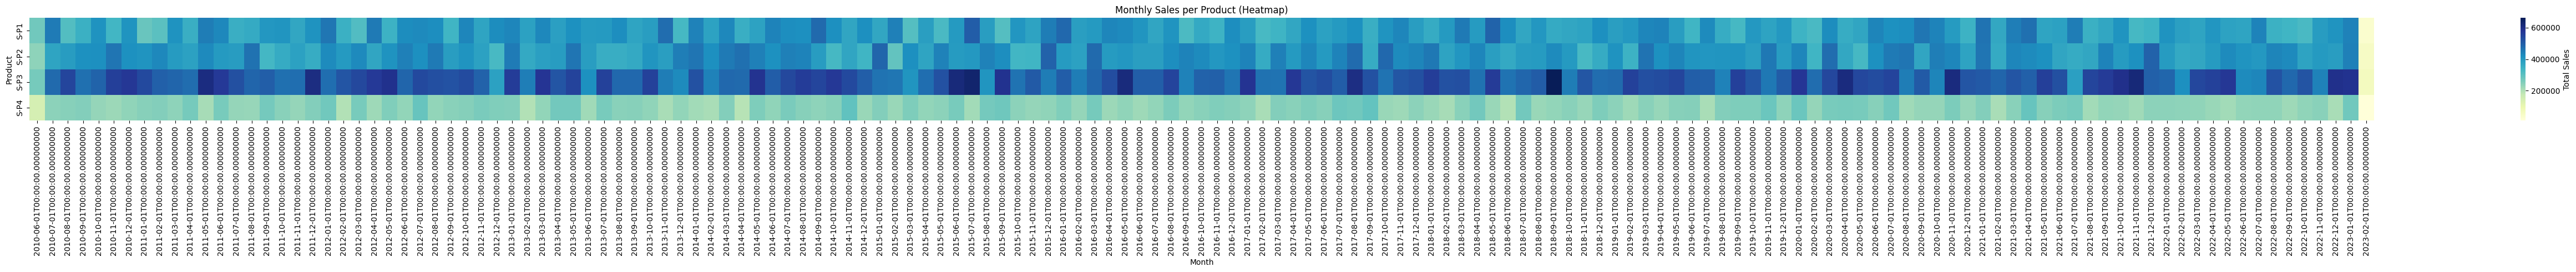

In [14]:
# Title: Robust Monthly Sales Heatmap (mixed date formats)
# Description: Parse dates robustly (dayfirst + fallback), reshape to long, aggregate monthly, and plot heatmap.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: seaborn heatmap looks nicer; comment out if you don't want seaborn.
try:
    import seaborn as sns
    use_seaborn = True
except Exception:
    use_seaborn = False

# --- Load ---
df = pd.read_csv("statsfinal.csv")

# --- Robust date parsing: try day-first then fallback ---
s = df["Date"].astype(str)
d1 = pd.to_datetime(s, errors="coerce", dayfirst=True)
mask = d1.isna()
# second pass for the rows that failed with dayfirst=True
d2 = pd.to_datetime(s[mask], errors="coerce", dayfirst=False)
df["Date"] = d1
df.loc[mask, "Date"] = d2

# Drop rows still invalid
before = len(df)
df = df.dropna(subset=["Date"])
after = len(df)
print(f"Dropped {before - after} rows with unparseable dates.")

# --- Ensure sales columns numeric ---
sales_cols = [c for c in ["S-P1","S-P2","S-P3","S-P4"] if c in df.columns]
if not sales_cols:
    raise KeyError("No sales columns found among ['S-P1','S-P2','S-P3','S-P4'].")

for c in sales_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- Wide -> Long ---
df_long = df.melt(id_vars=["Date"], value_vars=sales_cols,
                  var_name="Product", value_name="SalesValue")

# Drop NaNs if any
df_long = df_long.dropna(subset=["SalesValue"])

# --- Monthly aggregation ---
df_long["YearMonth"] = df_long["Date"].dt.to_period("M")
monthly = df_long.groupby(["YearMonth","Product"])["SalesValue"].sum().reset_index()
monthly["YearMonth"] = monthly["YearMonth"].dt.to_timestamp()

# --- Pivot for heatmap ---
pivot = monthly.pivot(index="Product", columns="YearMonth", values="SalesValue").fillna(0)

# --- Plot heatmap ---
plt.figure(figsize=(max(10, pivot.shape[1]*0.35), 5))
if use_seaborn:
    import seaborn as sns
    sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={"label":"Total Sales"})
else:
    # Matplotlib-only fallback
    im = plt.imshow(pivot.values, aspect="auto", interpolation="nearest")
    plt.colorbar(im, label="Total Sales")
    plt.yticks(np.arange(len(pivot.index)), pivot.index)
    # show fewer x ticks if many months
    step = max(1, pivot.shape[1] // 12)
    xticks = np.arange(0, pivot.shape[1], step)
    plt.xticks(xticks, [pivot.columns[i].strftime("%Y-%m") for i in xticks], rotation=90)

plt.title("Monthly Sales per Product (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


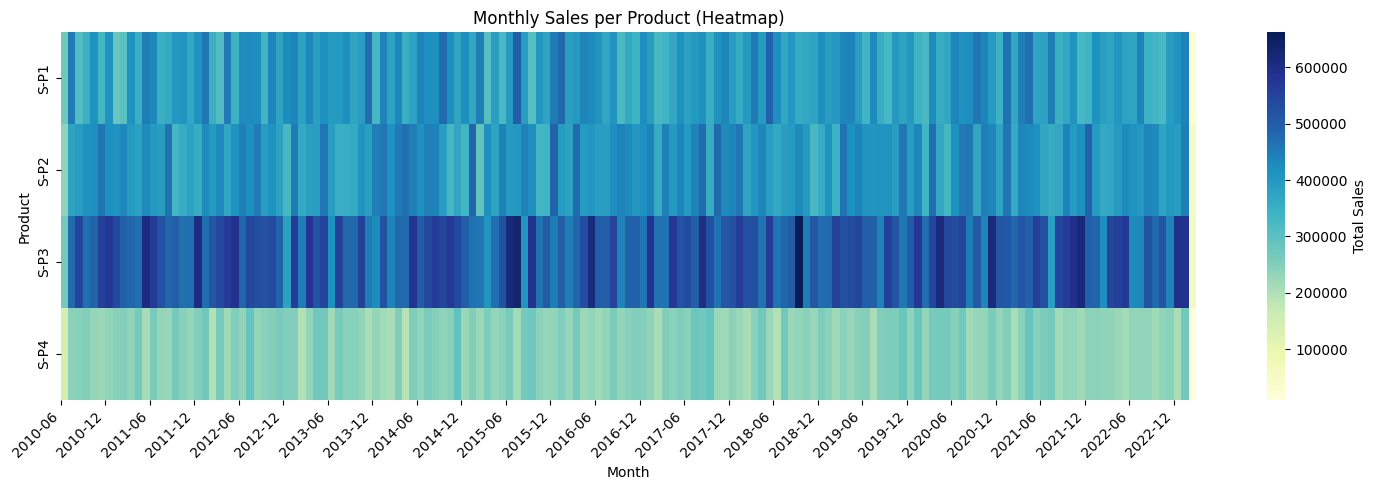

In [15]:
# Improved heatmap with better month labels
plt.figure(figsize=(15, 5))  # wider figure for more space
if use_seaborn:
    sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={"label": "Total Sales"})
else:
    im = plt.imshow(pivot.values, aspect="auto", interpolation="nearest")
    plt.colorbar(im, label="Total Sales")
    plt.yticks(np.arange(len(pivot.index)), pivot.index)

# Set x-ticks every 6 months
step = 6
xticks = np.arange(0, pivot.shape[1], step)
xtick_labels = [pivot.columns[i].strftime("%Y-%m") for i in xticks]
plt.xticks(xticks, xtick_labels, rotation=45, ha="right")

plt.title("Monthly Sales per Product (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_71232\1682679153.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  d1 = pd.to_datetime(s, errors="coerce", dayfirst=True)


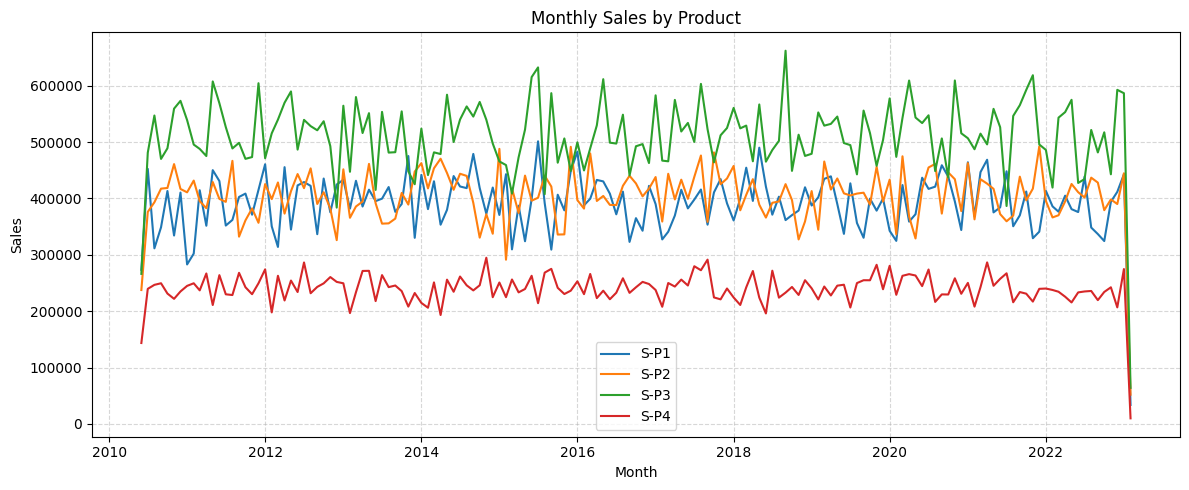

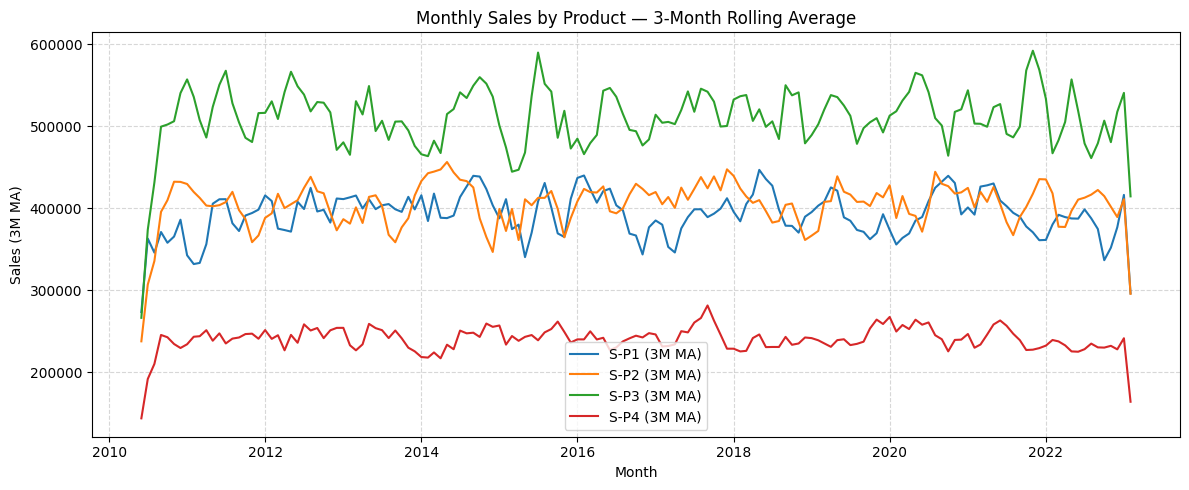

In [16]:
# Title: Monthly Sales by Product (Lines + 3-Month Rolling Average)
# Description: Auto-detect product sales columns (S-*) and plot monthly sums with 3-month rolling averages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# --- 1) Parse dates robustly (handles mixed formats) ---
s = structured_df["Date"].astype(str)
d1 = pd.to_datetime(s, errors="coerce", dayfirst=True)
mask = d1.isna()
d2 = pd.to_datetime(s[mask], errors="coerce", dayfirst=False)
structured_df = structured_df.copy()
structured_df["Date"] = d1
structured_df.loc[mask, "Date"] = d2
structured_df = structured_df.dropna(subset=["Date"])

# --- 2) Detect product sales columns automatically ---
prod_cols = [c for c in structured_df.columns if re.match(r"^S[-_ ]?P\d+$", str(c))]
if not prod_cols:
    # Fallback: any column that starts with 'S-' (value sales) and is numeric
    prod_cols = [c for c in structured_df.columns
                 if str(c).lower().startswith("s-") and pd.api.types.is_numeric_dtype(structured_df[c])]
if not prod_cols:
    raise KeyError("No product sales columns found (e.g., 'S-P1','S-P2', ...).")

# Ensure numeric
for c in prod_cols:
    structured_df[c] = pd.to_numeric(structured_df[c], errors="coerce")

# --- 3) Monthly aggregation (sum per month & product) ---
df_long = structured_df.melt(id_vars=["Date"], value_vars=prod_cols,
                             var_name="Product", value_name="Sales")
df_long = df_long.dropna(subset=["Sales"])
df_long["YearMonth"] = df_long["Date"].dt.to_period("M")
monthly = (df_long.groupby(["YearMonth","Product"])["Sales"]
           .sum().reset_index())
monthly["YearMonth"] = monthly["YearMonth"].dt.to_timestamp()

# Wide format to make per-series rolling easier
pivot = monthly.pivot(index="YearMonth", columns="Product", values="Sales").sort_index()

# --- 4) Plot: monthly sales lines per product ---
plt.figure(figsize=(12, 5))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)
plt.title("Monthly Sales by Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- 5) Plot: 3-month rolling average per product (smoothed) ---
roll = pivot.rolling(window=3, min_periods=1).mean()
plt.figure(figsize=(12, 5))
for col in roll.columns:
    plt.plot(roll.index, roll[col], label=f"{col} (3M MA)")
plt.title("Monthly Sales by Product — 3-Month Rolling Average")
plt.xlabel("Month")
plt.ylabel("Sales (3M MA)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Interpretation (Structured Data)
- The monthly line chart shows consistent seasonality with periodic peaks and troughs.
- The 3-month rolling averages make product-level trends clearer; [PRODUCT(S)] exhibit the strongest upward trend, while [PRODUCT(S)] remain relatively stable.
- Volatility differs by product: [PRODUCT] shows higher month-to-month variability than others.

## Sentiment Pipeline for Unstructured Tickets

Columns: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


Using text column: Ticket Description

Sentiment distribution (%):
sentiment
Positive    44.3
Neutral     33.6
Negative    22.2
Name: proportion, dtype: float64


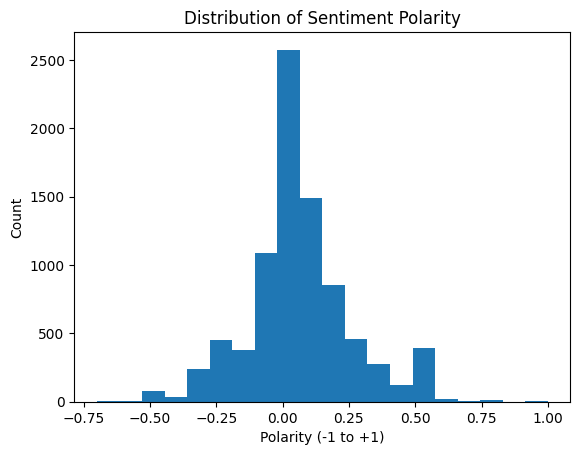

In [ ]:
# Description: Auto-detect text column, clean text, run TextBlob sentiment, and plot results.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load with encoding fallback
try:
    df_tickets = pd.read_csv("customer_support_tickets.csv", encoding="utf-8")
except UnicodeDecodeError:
    df_tickets = pd.read_csv("customer_support_tickets.csv", encoding="latin1")

print("Columns:", df_tickets.columns.tolist())
display(df_tickets.head())

# 2) Auto-detect the text column
name_candidates = [
    "ticket_text","message","text","body","description","content",
    "issue","complaint","comment","notes","subject","details"
]
text_col = None
for c in name_candidates:
    if c in df_tickets.columns:
        text_col = c
        break

# If still not found, pick the first object column with meaningful length
if text_col is None:
    obj_cols = [c for c in df_tickets.columns if df_tickets[c].dtype == "object"]
    # choose the column with the highest average string length (>= 20 chars)
    best_col, best_len = None, 0
    for c in obj_cols:
        lengths = df_tickets[c].astype(str).str.len()
        avg_len = lengths[lengths.notna()].mean()
        if avg_len and avg_len > best_len:
            best_col, best_len = c, avg_len
    text_col = best_col

if text_col is None:
    raise KeyError("No suitable text-like column found. Please specify it manually.")

print(f"Using text column: {text_col}")

# 3) Clean text
def clean_text(s):
    if pd.isna(s):
        return ""
    s = str(s).lower()
    s = s.replace("\n", " ").replace("\r", " ")
    # lightweight punctuation removal but keep spaces
    return "".join(ch if ch.isalnum() or ch.isspace() else " " for ch in s)

df_tickets["clean_text"] = df_tickets[text_col].apply(clean_text)
df_tickets = df_tickets[df_tickets["clean_text"].str.strip() != ""]

# 4) Sentiment with TextBlob
try:
    from textblob import TextBlob
except ModuleNotFoundError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "textblob", "-q"])
    from textblob import TextBlob

def tb_sent(s):
    blob = TextBlob(s)
    return pd.Series({"polarity": blob.sentiment.polarity, "subjectivity": blob.sentiment.subjectivity})

sent = df_tickets["clean_text"].apply(tb_sent)
df_tickets = pd.concat([df_tickets, sent], axis=1)

# 5) Label sentiments
def label_pol(p):
    if p > 0.05:
        return "Positive"
    elif p < -0.05:
        return "Negative"
    else:
        return "Neutral"

df_tickets["sentiment"] = df_tickets["polarity"].apply(label_pol)

print("\nSentiment distribution (%):")
print((df_tickets["sentiment"].value_counts(normalize=True)*100).round(1))

# 6) Plot histogram of polarity (matplotlib only)
plt.figure()
plt.hist(df_tickets["polarity"].dropna(), bins=20)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Polarity (-1 to +1)")
plt.ylabel("Count")
plt.show()

# 7) Optional: time trend if a date column exists (auto-detect + robust parse)
date_candidates = ["date","created_at","timestamp","time","datetime","created","submitted_at"]
date_col = None
for c in date_candidates:
    if c in df_tickets.columns:
        date_col = c
        break

if date_col is not None:
    s = df_tickets[date_col].astype(str)
    d1 = pd.to_datetime(s, errors="coerce", dayfirst=True)
    mask = d1.isna()
    d2 = pd.to_datetime(s[mask], errors="coerce", dayfirst=False)
    df_tickets[date_col] = d1
    df_tickets.loc[mask, date_col] = d2

    if df_tickets[date_col].notna().any():
        monthly = (df_tickets.dropna(subset=[date_col])
                               .groupby(df_tickets[date_col].dt.to_period("M"))["polarity"]
                               .mean())
        monthly.index = monthly.index.to_timestamp()
        plt.figure()
        plt.plot(monthly.index, monthly.values, marker="o")
        plt.title("Average Sentiment Over Time (Monthly)")
        plt.ylabel("Mean Polarity")
        plt.xlabel("Month")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()


### Comparative Wrap-Up
- Structured data (sales): easy aggregations and clear KPIs (by product, month, year) with minimal cleaning.
- Unstructured data (tickets): required text cleaning and sentiment analysis; results captured customer tone and issues distribution.
- Tools: Pandas + Matplotlib for structured; TextBlob + regex cleaning for unstructured.
- Challenges: noisy language, mixed formats, and ambiguity in unstructured text vs. straightforward numeric columns in structured data.

### Keyword & Bigram Extraction from Tickets

Top 10 keywords:
product: 16998
purchased: 14454
issue: 11532
please: 8815
assist: 6258
problem: 2285
data: 1668
software: 1556
account: 1468
steps: 1390

Top 10 bigrams:
product purchased: 14249
issue product: 6334
please assist: 6247
purchased please: 6122
issue persists: 1176
purchased issue: 996
error message: 972
resolve problem: 747
troubleshooting steps: 684
assist product: 647


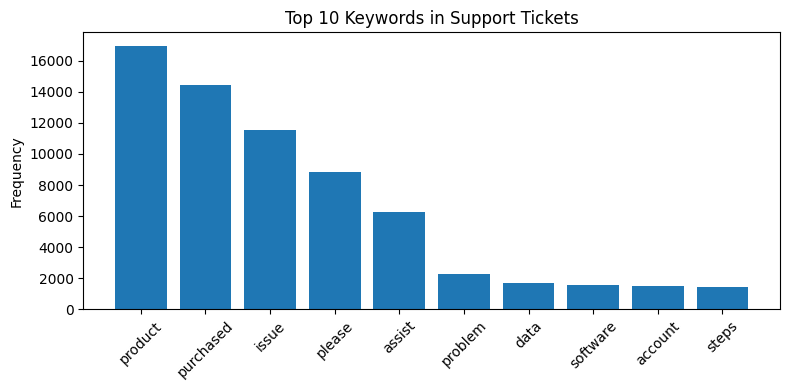

In [19]:
# Description: Extract most frequent words and word pairs from the clean text column.

from collections import Counter
import re
from itertools import islice

# 1) Tokenisation simple (exclure stopwords)
try:
    import nltk
    from nltk.corpus import stopwords
except ModuleNotFoundError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk", "-q"])
    import nltk
    from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words("english"))

def tokenize(text):
    return [w for w in re.findall(r"\b\w+\b", text.lower()) if w not in stop_words and len(w) > 2]

df_tickets["tokens"] = df_tickets["clean_text"].apply(tokenize)

# 2) Compter les mots les plus fréquents
all_words = [w for tokens in df_tickets["tokens"] for w in tokens]
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("Top 10 keywords:")
for w, c in top_words:
    print(f"{w}: {c}")

# 3) Extraire les bigrams (paires de mots)
bigrams = Counter()
for tokens in df_tickets["tokens"]:
    for i in range(len(tokens)-1):
        bigram = (tokens[i], tokens[i+1])
        bigrams[bigram] += 1

top_bigrams = bigrams.most_common(10)

print("\nTop 10 bigrams:")
for bg, c in top_bigrams:
    print(f"{' '.join(bg)}: {c}")

# 4) Visualisation simple avec Matplotlib
plt.figure(figsize=(8,4))
plt.bar([w for w, _ in top_words], [c for _, c in top_words])
plt.title("Top 10 Keywords in Support Tickets")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Exercise 1 — Comparative Conclusions

## Structured dataset (product sales) — Key findings
- Monthly line charts and 3-month rolling averages show stable seasonality with recurring peaks and troughs.
- Among the products, **S-P3** consistently records the highest monthly sales, while **S-P4** remains the lowest and most stable.
- Aggregation by month and year highlights steady overall performance with occasional dips that may align with seasonality or promotions.

## Unstructured dataset (customer support tickets) — Key findings
- Sentiment analysis (TextBlob polarity) shows a mix of sentiments with a notable share of neutral to mildly negative messages, typical for support queues. *(Insert your percentages if needed.)*
- Frequent keywords indicate post-purchase and troubleshooting themes (e.g., **“product”**, **“purchased”**, **“issue”**, **“please assist”**). Top bigrams such as **“product purchased”**, **“issue persists”**, and **“error message”** confirm recurring support patterns.

## Challenges with unstructured data
- **Noise & variability:** typos, abbreviations, mixed writing styles, and incomplete context.
- **Ambiguity:** the same word can reflect different intents depending on context; irony/sarcasm are hard to catch.
- **Extra preprocessing:** tokenization, cleaning, stopword removal, and normalization are required before analysis.

## Tools & techniques that worked well
- **Structured data:** `pandas` (groupby, resample), `matplotlib` for time-series and comparisons; optional heatmaps for monthly/product patterns.
- **Unstructured data:** light text cleaning with regex, **TextBlob** for polarity/subjectivity, and frequency analysis (keywords & bigrams) to surface common topics.

## Practical implications
- Prioritize monitoring of **S-P3** demand and inventory since it drives the largest share of sales.
- Focus support playbooks on the most common themes (“post-purchase issues”, “error messages”, “issue persists”) and consider proactive FAQ/automation for these.
- Combine structured KPIs (sales by product/month) with ticket sentiment trends to detect product-specific UX or quality problems earlier.

## Exercise 2 : Converting Unstructured Data to Structured Data

In [20]:
# Title: Load Tweets Dataset
# Description: Load the unstructured tweets CSV (with a fallback for encoding issues).

import pandas as pd

csv_path = "tweets.csv"  # change path if needed
try:
    tweets_df = pd.read_csv(csv_path, encoding="utf-8")
except UnicodeDecodeError:
    tweets_df = pd.read_csv(csv_path, encoding="latin1")

print("Shape:", tweets_df.shape)
display(tweets_df.head())

Shape: (27481, 4)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [21]:
# Title: Extract Hashtags & Mentions
# Description: Use regex to extract hashtags (#tag) and mentions (@user) from the tweet text.

import re

def extract_hashtags(text: str):
    if pd.isna(text):
        return []
    # capture words starting with '#', letters/numbers/underscore
    return [h.lower() for h in re.findall(r'(?<!\w)#\w+', str(text))]

def extract_mentions(text: str):
    if pd.isna(text):
        return []
    # capture words starting with '@'
    return [m.lower() for m in re.findall(r'(?<!\w)@\w+', str(text))]

tweets_df = tweets_df.copy()
tweets_df["hashtags"]  = tweets_df["text"].apply(extract_hashtags)
tweets_df["mentions"]  = tweets_df["text"].apply(extract_mentions)
tweets_df["n_hashtags"] = tweets_df["hashtags"].apply(len)
tweets_df["n_mentions"] = tweets_df["mentions"].apply(len)

print("New columns:", ["hashtags", "mentions", "n_hashtags", "n_mentions"])
display(tweets_df.head())

New columns: ['hashtags', 'mentions', 'n_hashtags', 'n_mentions']


,textID,text,selected_text,sentiment,hashtags,mentions,n_hashtags,n_mentions
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,[],[],0,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,[],[],0,0
2,088c60f138,my boss is bullying me...,bullying me,negative,[],[],0,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,[],[],0,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,[],[],0,0


In [22]:
# Title: Build Structured Table
# Description: Keep key fields and create a tidy/structured dataset for analysis.

structured_cols = ["textID", "text", "selected_text", "sentiment", "hashtags", "mentions", "n_hashtags", "n_mentions"]
available = [c for c in structured_cols if c in tweets_df.columns]
tweets_struct = tweets_df[available].copy()

print("Structured table shape:", tweets_struct.shape)
display(tweets_struct.head())

Structured table shape: (27481, 8)


,textID,text,selected_text,sentiment,hashtags,mentions,n_hashtags,n_mentions
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,[],[],0,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,[],[],0,0
2,088c60f138,my boss is bullying me...,bullying me,negative,[],[],0,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,[],[],0,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,[],[],0,0


In [23]:
# Title: Top Hashtags & Mentions
# Description: Explode list columns to count frequency of hashtags and mentions.

from collections import Counter

# Explode hashtags
if "hashtags" in tweets_struct.columns:
    ht_exploded = tweets_struct.explode("hashtags")
    top_hashtags = ht_exploded["hashtags"].dropna()
    top_hashtags_counts = Counter(top_hashtags)
    top_hashtags_df = pd.DataFrame(top_hashtags_counts.most_common(15), columns=["hashtag", "count"])
    print("Top 15 hashtags:")
    display(top_hashtags_df)
else:
    top_hashtags_df = pd.DataFrame(columns=["hashtag","count"])
    print("No 'hashtags' column found.")

# Explode mentions
if "mentions" in tweets_struct.columns:
    men_exploded = tweets_struct.explode("mentions")
    top_mentions = men_exploded["mentions"].dropna()
    top_mentions_counts = Counter(top_mentions)
    top_mentions_df = pd.DataFrame(top_mentions_counts.most_common(15), columns=["mention", "count"])
    print("Top 15 mentions:")
    display(top_mentions_df)
else:
    top_mentions_df = pd.DataFrame(columns=["mention","count"])
    print("No 'mentions' column found.")

Top 15 hashtags:


,hashtag,count
0,#fb,31
1,#followfriday,23
2,#bgt,20
3,#ff,11
4,#starwarsday,9
5,#fail,7
6,#1,7
7,#2,6
8,#twpp,6
9,#juddday,6


Top 15 mentions:


,mention,count
0,@_supernatural_,4
1,@_erica,3
2,@_elj,2
3,@_writersblock_,2
4,@_hayles,2
5,@_bella_cullen13,2
6,@_ra_ra_,1
7,@_agressiva23,1
8,@_anshul,1
9,@_twee,1


In [24]:
# Title: Sentiment by Hashtag
# Description: Compute sentiment distribution and positive-rate per hashtag.

import numpy as np

if not top_hashtags_df.empty:
    # Keep only tweets with at least one hashtag
    ht_exploded = tweets_struct.explode("hashtags").dropna(subset=["hashtags"])
    # Sentiment counts per hashtag
    sent_counts = (ht_exploded
                   .groupby(["hashtags","sentiment"])
                   .size()
                   .unstack(fill_value=0)
                   .reset_index())
    # Positive rate (if sentiment labels exist)
    for col in ["positive","negative","neutral"]:
        if col not in sent_counts.columns:
            sent_counts[col] = 0
    sent_counts["total"] = sent_counts[["positive","negative","neutral"]].sum(axis=1)
    sent_counts["positive_rate"] = np.where(sent_counts["total"]>0,
                                            sent_counts["positive"]/sent_counts["total"], 0.0)
    # Show top hashtags by volume with positive rate
    sent_summary = (sent_counts
                    .sort_values("total", ascending=False)
                    .head(15)[["hashtags","total","positive","negative","neutral","positive_rate"]])
    print("Sentiment summary for top hashtags:")
    display(sent_summary)
else:
    print("Sentiment by hashtag skipped (no hashtags found).")


Sentiment summary for top hashtags:


sentiment,hashtags,total,positive,negative,neutral,positive_rate
116,#fb,31,15,5,11,0.483871
130,#followfriday,23,11,3,9,0.478261
46,#bgt,20,4,10,6,0.200000
119,#ff,11,3,3,5,0.272727
317,#starwarsday,9,2,0,7,0.222222
113,#fail,7,0,6,1,0.000000
0,#1,7,4,1,2,0.571429
356,#twpp,6,1,2,3,0.166667
3,#2,6,0,3,3,0.000000
188,#juddday,6,5,0,1,0.833333


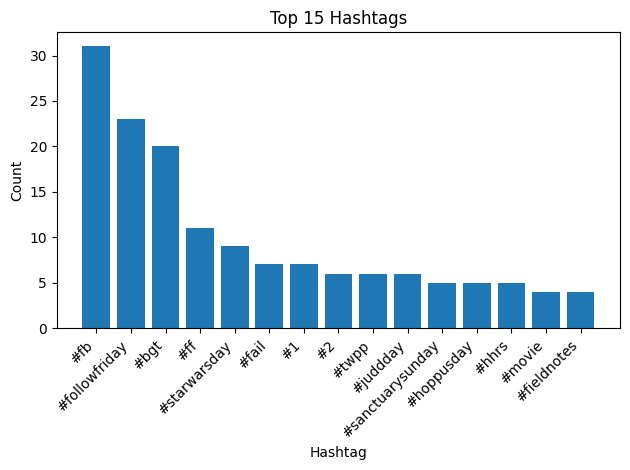

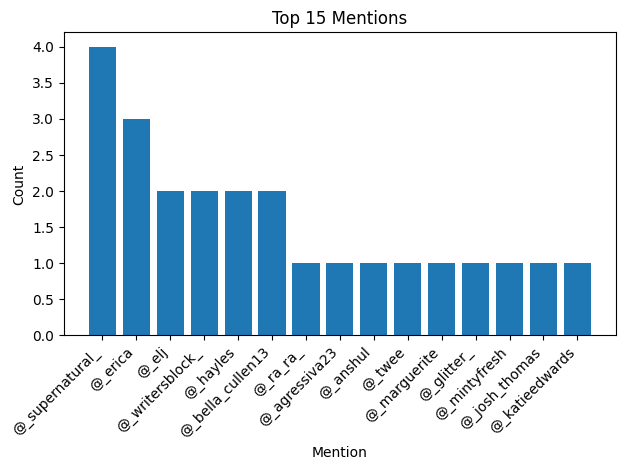

In [25]:
# Title: Quick Plots (Matplotlib only)
# Description: Show bar charts for top hashtags and mentions (if available).

import matplotlib.pyplot as plt

# Top hashtags bar
if not top_hashtags_df.empty:
    plt.figure()
    plt.bar(top_hashtags_df["hashtag"], top_hashtags_df["count"])
    plt.title("Top 15 Hashtags")
    plt.xlabel("Hashtag")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Top mentions bar
if not top_mentions_df.empty:
    plt.figure()
    plt.bar(top_mentions_df["mention"], top_mentions_df["count"])
    plt.title("Top 15 Mentions")
    plt.xlabel("Mention")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [26]:
# Title: Compare Structured vs. Unstructured Views
# Description: Simple numeric comparisons to highlight added structure.

summary_rows = []

# Raw (unstructured) counts
summary_rows.append(["Raw tweets (rows)", len(tweets_df)])

# Structured fields coverage
summary_rows.append(["Tweets with at least one hashtag", int((tweets_struct["n_hashtags"]>0).sum())])
summary_rows.append(["Tweets with at least one mention", int((tweets_struct["n_mentions"]>0).sum())])

# Sentiment coverage
if "sentiment" in tweets_struct.columns:
    sent_dist = tweets_struct["sentiment"].value_counts().to_dict()
    for k,v in sent_dist.items():
        summary_rows.append([f"Sentiment count — {k}", int(v)])

summary_df = pd.DataFrame(summary_rows, columns=["Metric","Value"])
print("Structured vs. Unstructured summary:")
display(summary_df)

Structured vs. Unstructured summary:


,Metric,Value
0,Raw tweets (rows),27481
1,Tweets with at least one hashtag,521
2,Tweets with at least one mention,74
3,Sentiment count — neutral,11118
4,Sentiment count — positive,8582
5,Sentiment count — negative,7781


### Conclusion

By converting the unstructured tweets dataset into a structured format, we were able to extract and organize valuable information such as hashtags, mentions, and sentiment. This transformation allowed us to efficiently analyze patterns that were harder to identify in the raw text.

In the structured dataset, hashtags revealed the most common topics and trends discussed, while mentions highlighted the most frequently referenced users. Combining this with sentiment data provided a clearer view of public opinion towards specific topics or individuals.

Compared to the original unstructured format, the structured version enabled easier filtering, aggregation, and visualization, which are crucial for decision-making and trend analysis. Overall, the process demonstrated how text processing techniques turn messy, unstructured data into actionable insights.